In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
from scipy import spatial
from tqdm import tqdm, trange

from typing import Tuple
import utils
%matplotlib inline

In [18]:
dataset_paths = [
    'datasets/dataset_1_1e+02',
    'datasets/dataset_2_1e+04',
    'datasets/dataset_3_1e+06',
    'datasets/dataset_4_1e+06',
]
chosen_dataset_idx = 0

In [3]:
def load_dataset(path):
    with open(path, 'r') as fp:
        n = fp.readline()
        arr = np.loadtxt(fp)
        return arr

vertices_xyc = utils.G_3_tirs_perturbed
# print(vertices_xyc)
# vertices_xyc = utils.G_3_tirs
# vertices_xyc = utils.G_simple
# vertices_xyc = load_dataset(dataset_paths[chosen_dataset_idx] + '.in')
# print(vertices_xyc)

In [4]:
# cmap = cm.autumn
# norm = Normalize(vmin=1, vmax=10)
# node_color = list(map(lambda x: cmap(norm(x[2])), tqdm(vertices_xyc)))

node_color = list(map(lambda x: x[2], vertices_xyc))

pos = {}
for i, xyc in tqdm(enumerate(vertices_xyc)):
    pos[i + 1] = xyc[:2]

10it [00:00, 7341.68it/s]


100%|██████████| 10/10 [00:00<00:00, 784.89it/s]


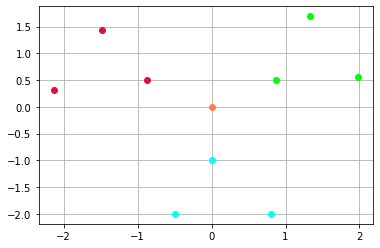

In [6]:
# plt.xlim([-1, 3])
# plt.ylim([-1, 6])
plt.grid()
for x, y, c in tqdm(vertices_xyc):
#     plt.plot(x, y, 'bo', color=cmap(norm(c)))
    plt.plot(x, y, 'bo', color=c)

In [22]:
# G = nx.complete_graph(range(1, 1_000_00 + 1))
# len(G)

In [7]:
G = nx.Graph()

In [8]:
for i, xyc in tqdm(enumerate(vertices_xyc, start=1)):
    G.add_node(i)
    G.nodes[i]['pos'] = xyc[:2]
    G.nodes[i]['color'] = xyc[2]

10it [00:00, 16313.90it/s]


In [25]:
vertices_xyc[:10]
vertices_xyc[:10][:,:2]

array([[ 0.1039,  0.4419],
       [ 0.2459, -0.0641],
       [-0.2368, -0.2064],
       [-0.4939,  0.116 ],
       [ 0.1383,  0.253 ],
       [ 0.2168,  0.3881],
       [-0.01  , -0.455 ],
       [-0.4672,  0.2271],
       [-0.2104,  0.3363],
       [ 0.3713, -0.4896]])

For the datasets version:

In [13]:
for i in tqdm(range(len(vertices_xyc[:,:2]))):
    for j in (range(i + 1, len(vertices_xyc[:,:2]))):
        u_xy = vertices_xyc[i]
        v_xy = vertices_xyc[j]
        G.add_edge(i + 1, j + 1, weight=spatial.distance.euclidean(u_xy, v_xy))
#         G.edges[i + 1, j + 1]['weight'] = spatial.distance.euclidean(u_xy, v_xy)

TypeError: list indices must be integers or slices, not tuple

For utils graphs version:

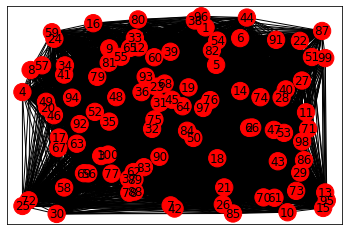

In [27]:
utils.draw_graph(G, pos=pos, node_color=node_color, label=None)

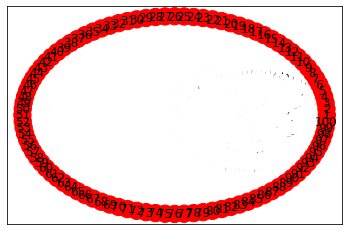

In [7]:
utils.draw_graph(G, node_color=node_color)

In [28]:
mcst = nx.minimum_spanning_tree(G, algorithm='kruskal')
weights = map(lambda n: n[2]['weight'], mcst.edges(data=True))
w = sum(tqdm(weights))
# mcst = nx.minimum_spanning_tree(G)

99it [00:00, 90131.56it/s]


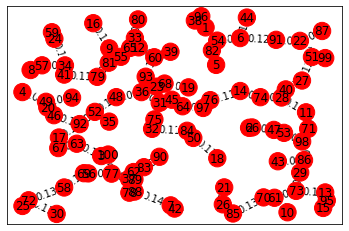

In [29]:
utils.draw_graph(mcst, pos=pos, node_color=node_color)

In [32]:
# print(mcst.edges)
print(f'MCST\'s Weight:{w: .4f}')

MCST's Weight: 7.0133


In [33]:
with open(dataset_paths[chosen_dataset_idx]+'.out', 'w') as fp:
    fp.write(str(round(w, 4)))